In [1]:
import numpy as np
import steepest_gradient_descent
import newton
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## 問題設定
適当な$\mathbb{R}^{2\times 2}$半正定値行列を作り二次凸計画問題を考える(連立線形方程式)

In [2]:
class Positive_matrix:    
    def __init__(self, n_size = 2):                
        np.random.seed(10)
        A = np.random.random((n_size, n_size))
        self.n_size = n_size        
        self.A = A.T @ A
        ##
        self.A = np.array([[2,0],[0,1]])
        ##
        self.x0 = np.array([1,1])

    def f(self,x):
        return x@self.A@x
    def df(self,x):
        return self.A@x
    def ddf(self,x):
        return self.A

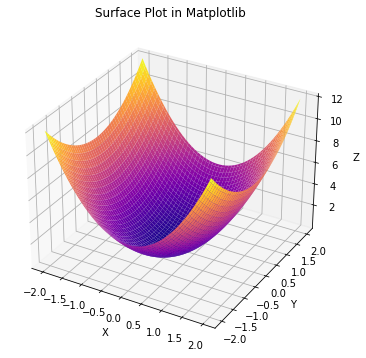

In [3]:
p1 = Positive_matrix()
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-2,2,100)
ydata = np.linspace(-2,2,100)
X,Y = np.meshgrid(xdata,ydata)
Z = []
for i in range(100):
    for j in range(100):
        x_temp = np.array([xdata[j], ydata[i]])
        Z.append(p1.f(x_temp))   
Z = np.array(Z).reshape(100,100)

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

plt.show()

教科書の例題の関数

In [4]:
class Example_fun:    
    def __init__(self):                
        self.x0 = np.array([1,1])
    def f(self,x):
        return x[0]**4 + x[1]**4 + 3*x[0]**2 * x[1]**2 - 2*x[1]**2
    def df(self,x):        
        return np.array([4*x[0]**3 + 6*x[0]*x[1]**2, 4*x[1]**3 + 6*x[0]**2*x[1] - 4*x[1]])
    def ddf(self,x):
        return np.array([[12*x[0]**2 + 6*x[1]**2, 12*x[0]*x[1]], [12*x[0]*x[1], 12*x[1]**2 - 4]])

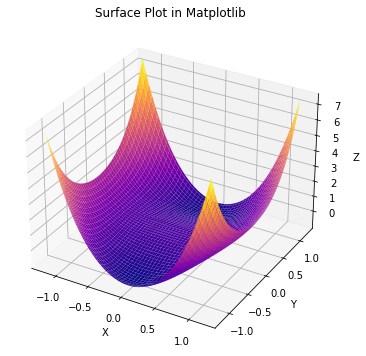

In [5]:
exfun = Example_fun()
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1.2,1.2,100)
ydata = np.linspace(-1.2,1.2,100)
X,Y = np.meshgrid(xdata,ydata)
Z = exfun.f([X,Y])

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

plt.show()

## 最急降下法

In [6]:
# 問題の設定
f = exfun.f
df = exfun.df
ddf = exfun.ddf
x0 = exfun.x0

optimizer = steepest_gradient_descent.Optimizer(f, df)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  -0.9999999999999474
optimal solution :  [-1.81329443e-23 -1.00000011e+00]
num iterated :  42


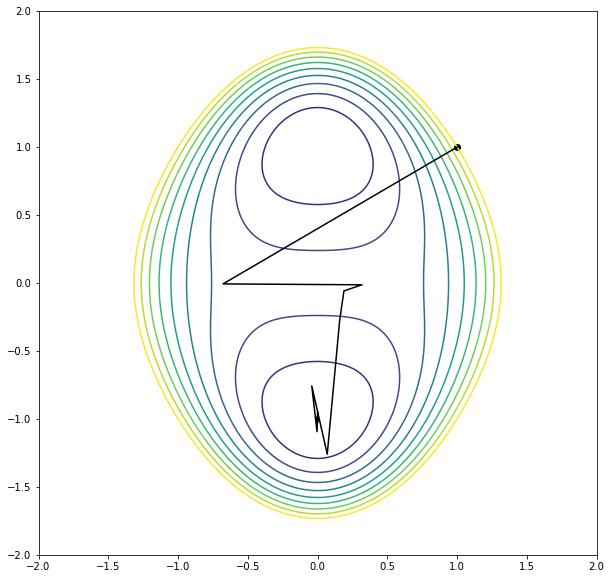

In [7]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

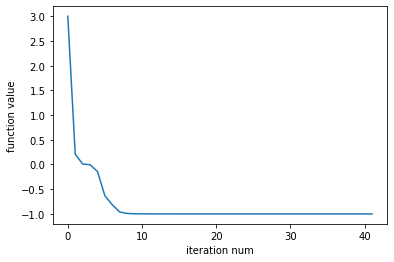

In [8]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## ニュートン法
暫定解周りで二次近似して最小値に更新するので一回の更新で最適値に到達

In [15]:
## なぜか[1,1]での固有値が不安定
x = np.array([1.1,1.1])
np.linalg.inv(ddf(x))@df(x)

array([0.58201058, 0.04365079])

In [10]:
optimizer = newton.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  -1.0
optimal solution :  [-2.19161724e-10 -1.00000000e+00]
num iterated :  133


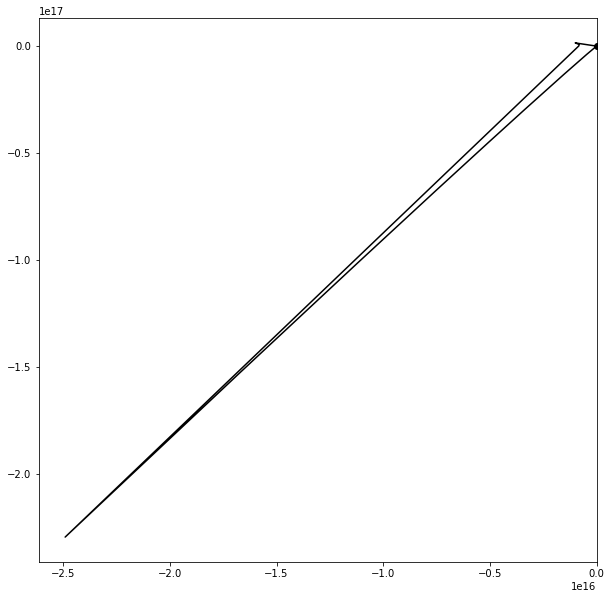

In [11]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(0,1,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

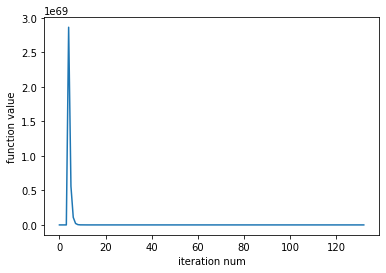

In [12]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)